In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [4]:
x = np.array([1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22])
y = np.array([100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100])

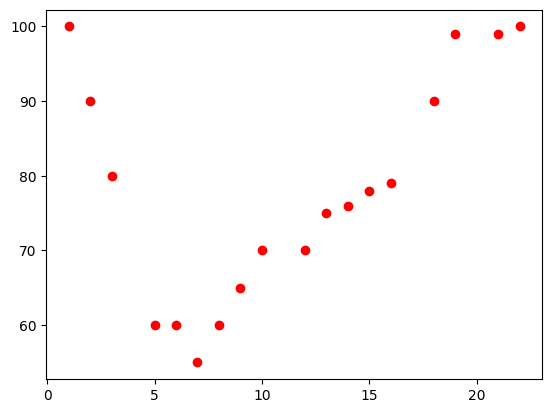

In [5]:
plt.scatter(x, y, color='red');

In [6]:
x_sqr_x = x.reshape(-1, 1)
x_sqr_x

array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [12],
       [13],
       [14],
       [15],
       [16],
       [18],
       [19],
       [21],
       [22]])

In [7]:
x_sqr_x = np.concatenate([x_sqr_x, x_sqr_x ** 2], axis=1)
x_sqr_x

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100],
       [ 12, 144],
       [ 13, 169],
       [ 14, 196],
       [ 15, 225],
       [ 16, 256],
       [ 18, 324],
       [ 19, 361],
       [ 21, 441],
       [ 22, 484]])

In [8]:
def poly(x, p=2):
    x = x.reshape(-1, 1)
    px = x.copy()
    for i in range(2, p + 1):
        px = np.concatenate([px, x ** i], axis=1)
    return px

In [9]:
px = poly(x, 3)
px

array([[    1,     1,     1],
       [    2,     4,     8],
       [    3,     9,    27],
       [    5,    25,   125],
       [    6,    36,   216],
       [    7,    49,   343],
       [    8,    64,   512],
       [    9,    81,   729],
       [   10,   100,  1000],
       [   12,   144,  1728],
       [   13,   169,  2197],
       [   14,   196,  2744],
       [   15,   225,  3375],
       [   16,   256,  4096],
       [   18,   324,  5832],
       [   19,   361,  6859],
       [   21,   441,  9261],
       [   22,   484, 10648]])

In [10]:
model = LinearRegression()

In [11]:
model.fit(px, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
preds = model.predict(px)
preds

array([99.54274393, 87.82218964, 78.42444862, 65.86970529, 62.34885243,
       60.42311173, 59.91055791, 60.6292657 , 62.39730983, 68.35370596,
       72.17820742, 76.32434409, 80.61019072, 84.85382201, 92.4867375 ,
       95.51217113, 99.07136381, 99.24127229])

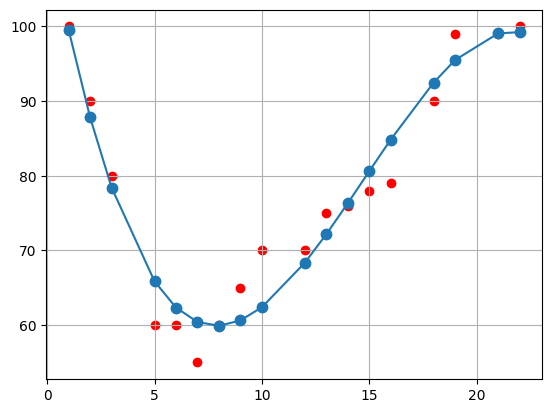

In [18]:
plt.scatter(x, y, color="r")
plt.plot(x, preds, marker=".", markersize=15)
plt.grid()

In [14]:
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)
mse, mae, r2

(12.473061469757207, 2.7764586193798895, 0.9432150416451026)

In [20]:
def regression_report(y_true, y_pred):
    print(f"Min y:         {y_true.min():.2f}")
    print(f"Max y:         {y_true.max():.2f}")
    print(f"Mean y:        {y_true.mean():.2f}")
    print(f"Std deviation: {y_true.std():.2f}")
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print()
    print(f"Mean Squared Error (MSE):       {mse:.3f}")
    print(f"Mean Absolute Error (MAE):      {mae:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R^2 Score:                      {r2:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [21]:
def regression_plots(y_true, y_pred):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        'r--', lw=2, label='Ideal'
    )
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Actual Values')
    plt.legend()

    plt.subplot(1, 2, 2)
    errors = y_true - y_pred
    plt.hist(errors, bins=30, edgecolor='black')
    plt.xlabel('Error (Actual - Prediction)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors')
    plt.tight_layout()
    plt.show()

In [24]:
regression_report(y, preds)

Min y:         55.00
Max y:         100.00
Mean y:        78.11
Std deviation: 14.82

Mean Squared Error (MSE):       12.473
Mean Absolute Error (MAE):      2.776
Root Mean Squared Error (RMSE): 3.532
R^2 Score:                      0.943
Mean Absolute Percentage Error (MAPE): 3.92%


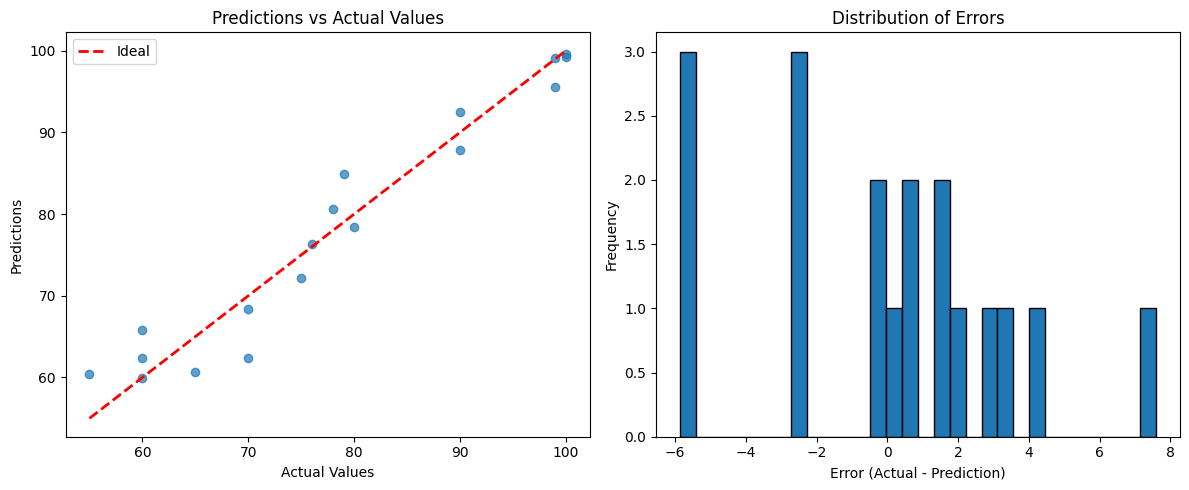

In [23]:
regression_plots(y, preds)